In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('diabetes.csv')

    # Display the first five rows
    print("First five rows of the DataFrame:")
    print(df.head())
    print("\n")

    # Print the shape of the DataFrame
    print("Shape of the DataFrame:", df.shape)
    print("\n")

    # List all column names
    print("Column names:", df.columns.tolist())

except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found. Make sure you have uploaded it to Colab.")
except Exception as e:
    print(f"An error occurred: {e}")

First five rows of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Shape of the DataFrame: (768, 9)


Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('diabetes.csv')

    # 1. Detect and print the number of missing values in each column
    print("Number of missing values per column:")
    print(df.isnull().sum())
    print("\n")

    # 2. Drop rows with any missing values
    initial_rows = df.shape[0]
    df_cleaned_missing = df.dropna()
    rows_dropped_missing = initial_rows - df_cleaned_missing.shape[0]
    print(f"Number of rows dropped due to missing values: {rows_dropped_missing}")
    print("\n")

    # 3. Remove duplicate rows (if any) and print the number of rows removed
    initial_rows_cleaned = df_cleaned_missing.shape[0]
    df_cleaned_duplicates = df_cleaned_missing.drop_duplicates()
    rows_dropped_duplicates = initial_rows_cleaned - df_cleaned_duplicates.shape[0]
    print(f"Number of duplicate rows removed: {rows_dropped_duplicates}")
    print("\n")

    # 4. Print the shape of the cleaned DataFrame
    print("Shape of the cleaned DataFrame:", df_cleaned_duplicates.shape)

except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found. Make sure you have uploaded it to Colab.")
except Exception as e:
    print(f"An error occurred: {e}")

Number of missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Number of rows dropped due to missing values: 0


Number of duplicate rows removed: 0


Shape of the cleaned DataFrame: (768, 9)


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('diabetes.csv')

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Encode the 'Outcome' column
    df['Outcome'] = label_encoder.fit_transform(df['Outcome'])
    print("DataFrame after Label Encoding 'Outcome':")
    print(df.head())
    print("\n")

    # Identify numeric features (excluding 'Outcome')
    numeric_features = df.columns.drop('Outcome')

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Apply standard scaling to numeric features
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    # Display the transformed DataFrame
    print("Transformed DataFrame after Standard Scaling:")
    print(df.head())

except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found. Make sure you have uploaded it to Colab.")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame after Label Encoding 'Outcome':
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Transformed DataFrame after Standard Scaling:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('diabetes.csv')

    # Separate features (X) and target (y)
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Split the data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Decision Tree Classifier
    model = DecisionTreeClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Print model parameters
    print("Decision Tree Classifier Parameters:")
    print(model.get_params())
    print("\n")

    # Confirm training completion
    print("Decision Tree Classifier training completed successfully!")

except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found. Make sure you have uploaded it to Colab.")
except Exception as e:
    print(f"An error occurred: {e}")

Decision Tree Classifier Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


Decision Tree Classifier training completed successfully!


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('diabetes.csv')

    # Separate features (X) and target (y)
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Split the data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Classifier
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model

    # 1. Print the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy:.4f}")
    print("\n")

    # 2. Display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

    # 3. Print the classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found. Make sure you have uploaded it to Colab.")
except Exception as e:
    print(f"An error occurred: {e}")

Accuracy Score: 0.7468


Confusion Matrix:
[[75 24]
 [15 40]]


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



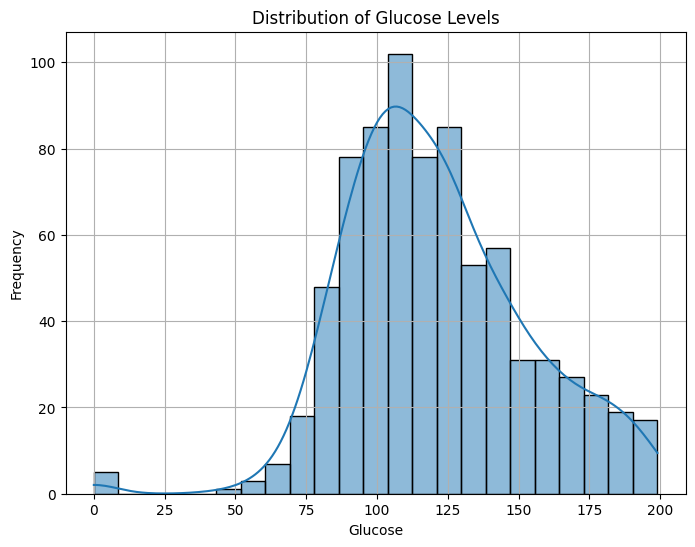

<Figure size 1200x1200 with 0 Axes>

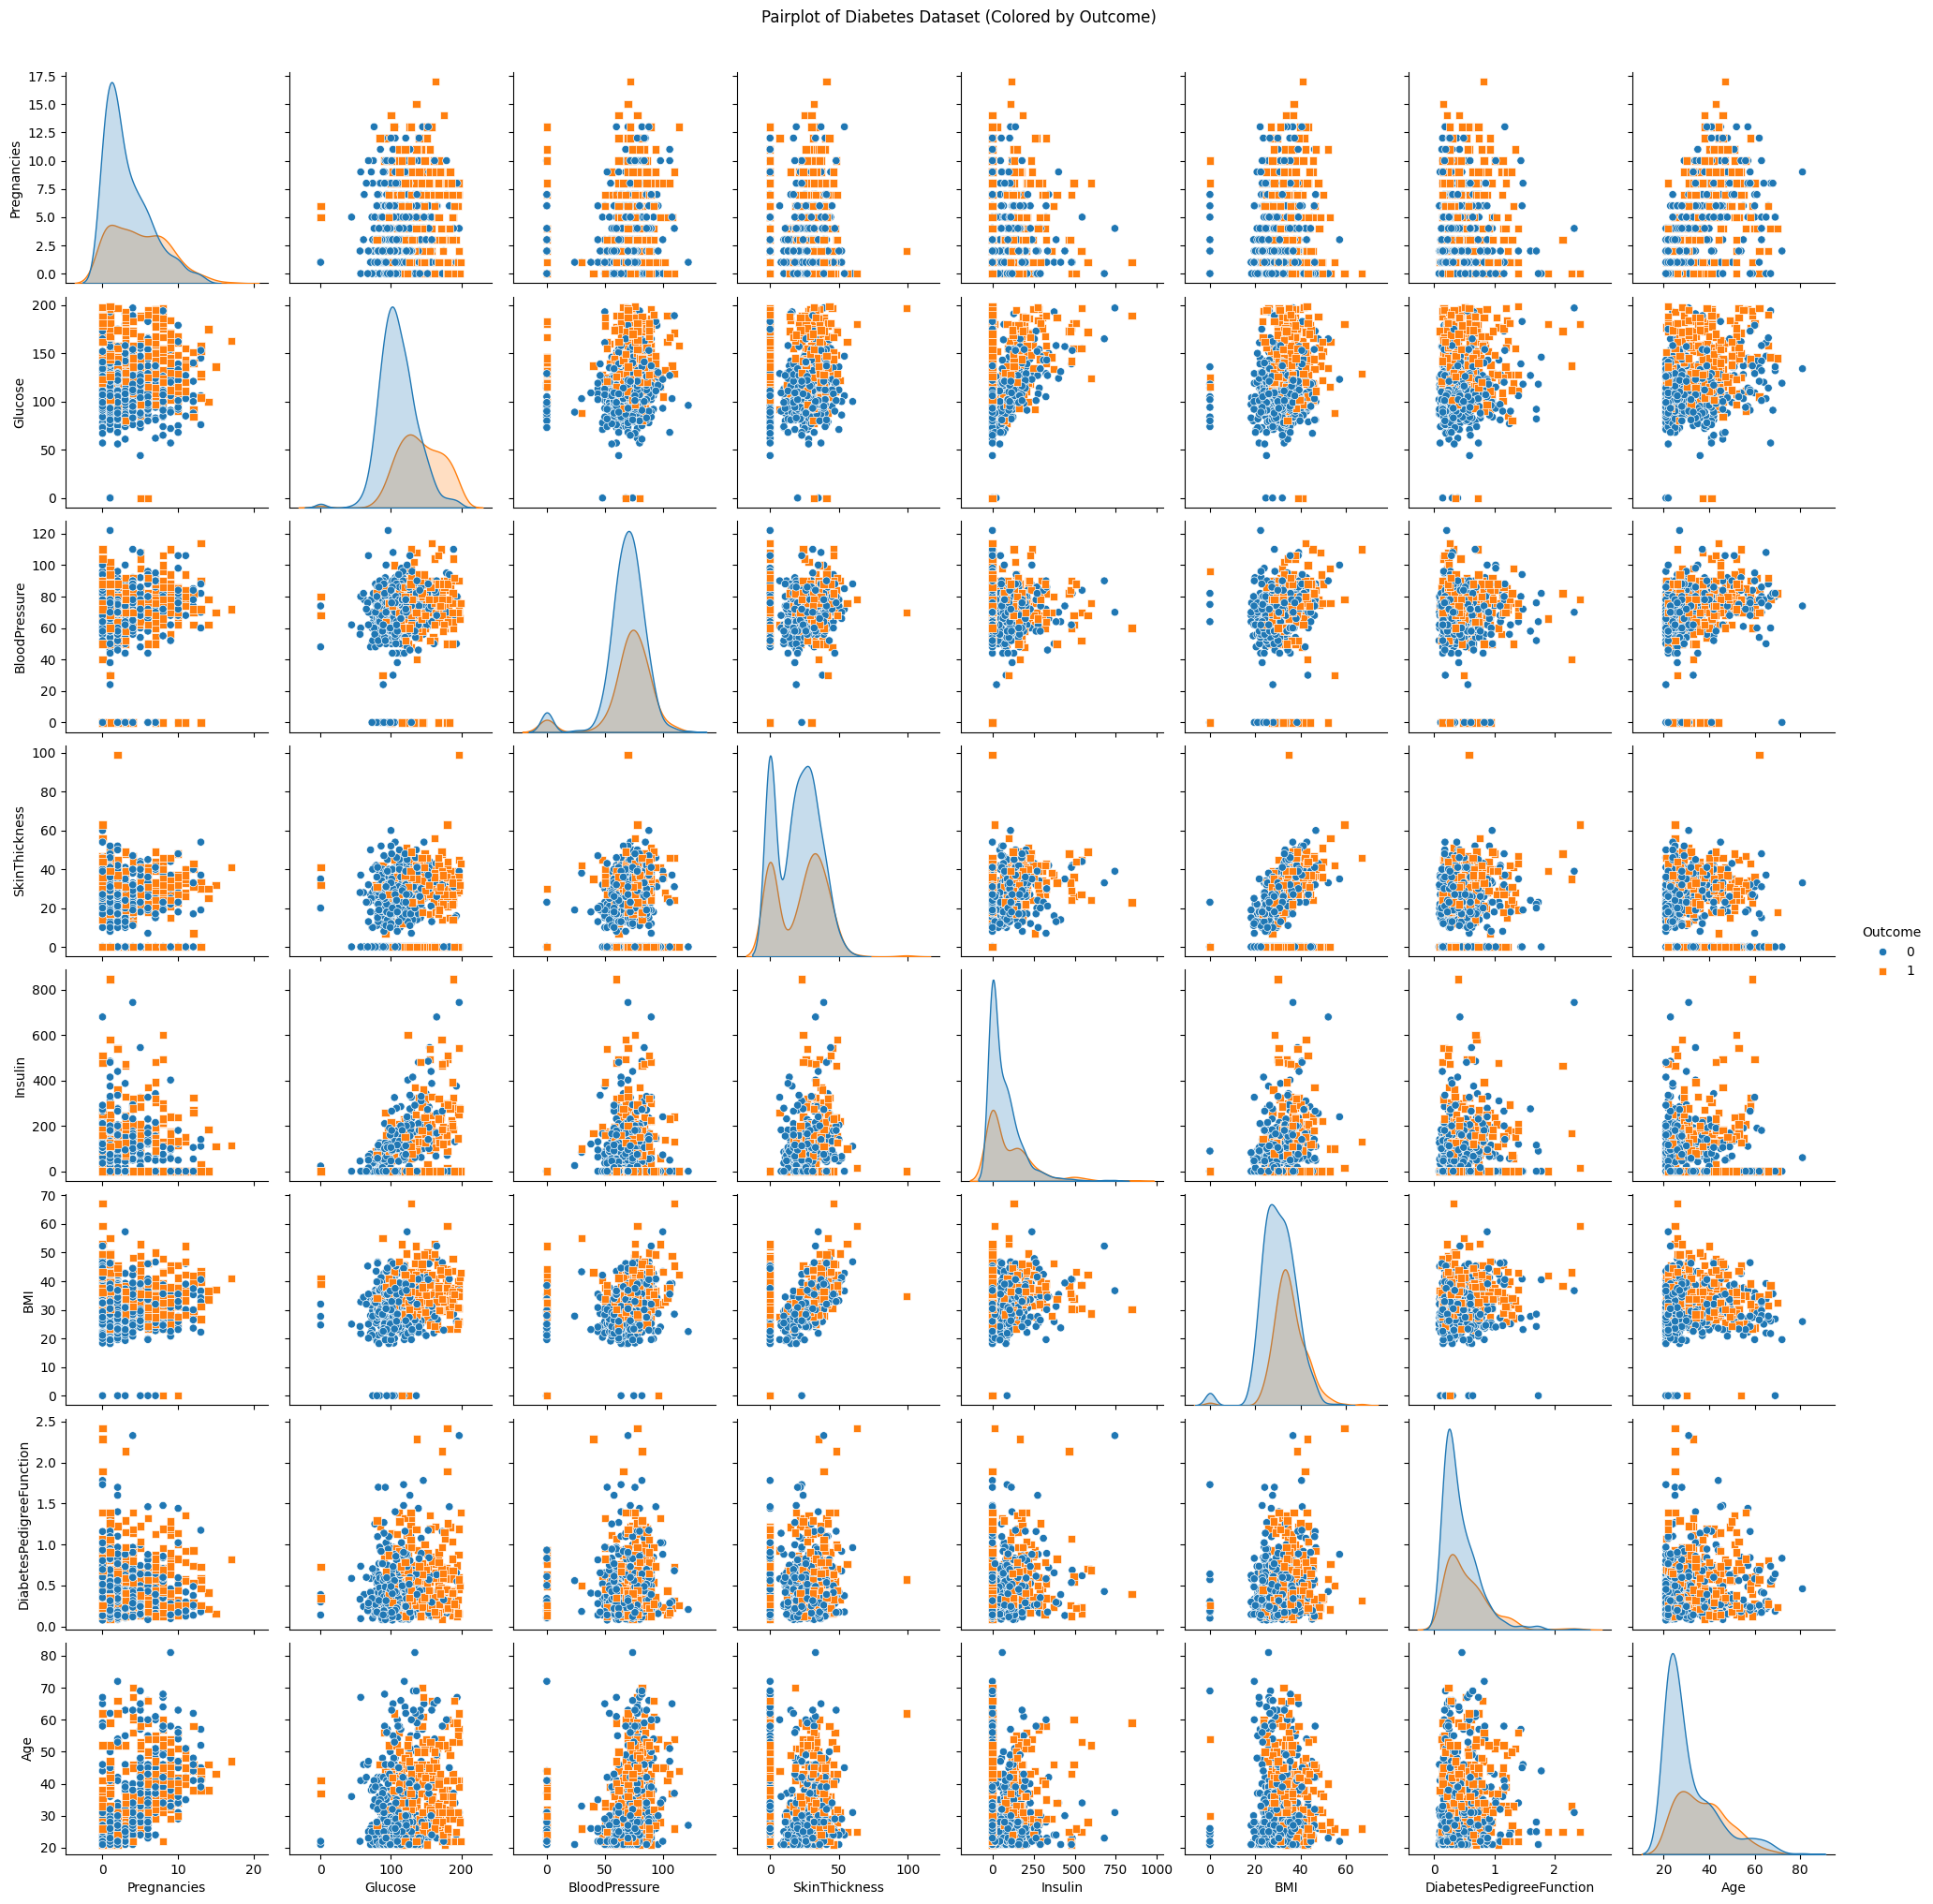

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('diabetes.csv')

    # 1. Create a histogram of the 'Glucose' column
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Glucose'], kde=True)
    plt.title('Distribution of Glucose Levels')
    plt.xlabel('Glucose')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # 2. Generate a seaborn pairplot of the entire dataset, colored by 'Outcome'
    plt.figure(figsize=(12, 12))
    sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=['o', 's'])
    plt.suptitle('Pairplot of Diabetes Dataset (Colored by Outcome)', y=1.02)
    plt.show()

except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found. Make sure you have uploaded it to Colab.")
except Exception as e:
    print(f"An error occurred: {e}")